In [43]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import selectivesearch
import matplotlib.patches as mpatches
import numpy as np

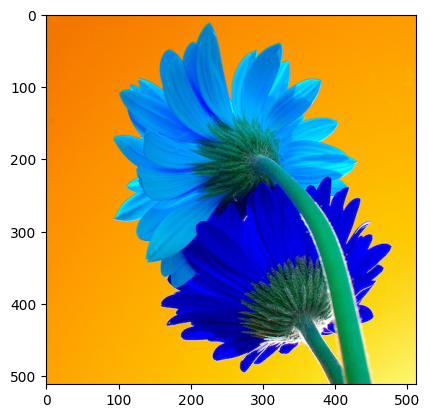

In [21]:
#Segmentación de color
image = cv.imread('imagenes/flowers.jpg')
image_rgb = cv.cvtColor(imagen, cv.COLOR_BGR2RGB) #Cambio de formato
plt.imshow(image_rgb)

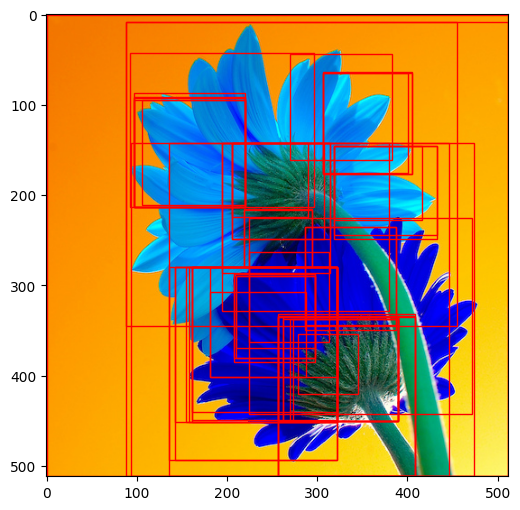

In [45]:
img_lbl, regions = selectivesearch.selective_search(image_rgb, scale=100, sigma=0.9, min_size=10)
candidates = set()
for r in regions:
        # excluding same rectangle (with different segments)
        if r['rect'] in candidates:
            continue
        # excluding regions smaller than 2000 pixels
        if r['size'] < 2000:
            continue
        # distorted rects
        x, y, w, h = r['rect']
        if w / h > 1.2 or h / w > 1.2:
            continue
        candidates.add(r['rect'])

    # draw rectangles on the original image
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(image_rgb)
for x, y, w, h in candidates:
        #print(x, y, w, h)
        rect = mpatches.Rectangle(
            (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)

plt.show()